<a href="https://colab.research.google.com/github/TNaingHtwe/GraSPP-25S-climatechange/blob/main/notebooks/20250622_Regression_LLM_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/TNaingHtwe/GraSPP-25S-climatechange.git
%cd GraSPP-25S-climatechange/notebooks

Cloning into 'GraSPP-25S-climatechange'...
remote: Enumerating objects: 479, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 479 (delta 51), reused 45 (delta 31), pack-reused 387 (from 2)
Receiving objects: 100% (479/479), 44.05 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/GraSPP-25S-climatechange/notebooks


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [86]:
# Load US & Japan manifesto word frequency
manifesto_df = pd.read_csv("../data/processed/manifesto_us_japan_word_freq.csv")
print("Manifesto dataset preview:")
display(manifesto_df.head())
display(manifesto_df ['country'].unique())
display(manifesto_df ['vocab'].unique())
display(manifesto_df ['year'].unique())

# JP related data
manifesto_df_jp = pd.read_csv("../data/processed/manifesto_us_japan_related_score.csv")
display(manifesto_df_jp.head())
display(manifesto_df_jp ['countryname'].unique())
display(manifesto_df_jp ['date'].unique())


# Load NDC word counts
ndc_df = pd.read_csv("../data/processed/ndc_word_counts.csv")
print("NDC word counts preview:")
display(ndc_df.head())

Manifesto dataset preview:


,country,year,vocab,count
0,Japan,2014,ghg,0
1,Japan,2014,greenhouse,0
2,Japan,2014,net-zero,0
3,Japan,2014,carbon,0
4,Japan,2017,ghg,0


array(['Japan', 'United States'], dtype=object)

array(['ghg', 'greenhouse', 'net-zero', 'carbon'], dtype=object)

array([2014, 2017, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016, 2020])

,Unnamed: 0,countryname,date,party,partyname,keys,manifesto_id,text,eng_text,score
0,0,United States,1960-11-01,61320,Democratic Party,61320_196011,61320_196011,"In 1796, in America's first contested national...","In 1796, in America's first contested national...",0.950216
1,1,United States,1960-11-01,61620,Republican Party,61620_196011,61620_196011,PREAMBLE The United States is living in an age...,PREAMBLE The United States is living in an age...,0.786391
2,2,United States,1964-11-01,61320,Democratic Party,61320_196411,61320_196411,"ONE NATION, ONE PEOPLE. America is One Nation,...","ONE NATION, ONE PEOPLE. America is One Nation,...",0.944717
3,3,United States,1964-11-01,61620,Republican Party,61620_196411,61620_196411,"""FOR THE PEOPLE"" SECTION ONE For a Free People...","""FOR THE PEOPLE"" SECTION ONE For a Free People...",0.968494
4,4,United States,1968-11-01,61320,Democratic Party,61320_196811,61320_196811,THE TERMS OF OUR DUTY America belongs to the p...,THE TERMS OF OUR DUTY America belongs to the p...,0.789595


array(['United States', 'Japan'], dtype=object)

array(['1960-11-01', '1964-11-01', '1968-11-01', '1972-11-01',
       '1976-11-01', '1980-11-01', '1984-11-01', '1988-11-01',
       '1992-11-01', '1996-11-01', '2000-11-01', '2004-11-01',
       '2008-11-01', '2012-11-01', '2016-11-01', '2020-11-01',
       '2014-12-01', '2017-10-01'], dtype=object)

NDC word counts preview:


,ghg,greenhouse,net-zero,carbon,country
0,7,29,0,21,EU2023
1,1,43,0,36,US2021
2,3,58,0,33,US2024



# Filtering High Score to match the keywords

In [87]:
# Filter manifesto data where score > 0.9
manifesto_highscore_df = manifesto_df_jp[manifesto_df_jp['score'] > 0.9].copy()

# Preview the filtered data
print("Filtered manifestos with score > 0.9:")
display(manifesto_highscore_df.head())

print(f"Original rows: {len(manifesto_df_jp)}")
print(f"Filtered rows (score > 0.9): {len(manifesto_highscore_df)}")

Filtered manifestos with score > 0.9:


,Unnamed: 0,countryname,date,party,partyname,keys,manifesto_id,text,eng_text,score
0,0,United States,1960-11-01,61320,Democratic Party,61320_196011,61320_196011,"In 1796, in America's first contested national...","In 1796, in America's first contested national...",0.950216
2,2,United States,1964-11-01,61320,Democratic Party,61320_196411,61320_196411,"ONE NATION, ONE PEOPLE. America is One Nation,...","ONE NATION, ONE PEOPLE. America is One Nation,...",0.944717
3,3,United States,1964-11-01,61620,Republican Party,61620_196411,61620_196411,"""FOR THE PEOPLE"" SECTION ONE For a Free People...","""FOR THE PEOPLE"" SECTION ONE For a Free People...",0.968494
5,5,United States,1968-11-01,61620,Republican Party,61620_196811,61620_196811,"PREAMBLE, PURPOSES AND PLEDGES Twice before, o...","PREAMBLE, PURPOSES AND PLEDGES Twice before, o...",0.964536
6,6,United States,1972-11-01,61320,Democratic Party,61320_197211,61320_197211,New Directions: '72-'76 Skepticism and cynicis...,New Directions: '72-'76 Skepticism and cynicis...,0.985475


Original rows: 41
Filtered rows (score > 0.9): 26


# Filtering with just specific words


In [88]:
# Define the keywords
keywords = ['ghg', 'greenhouse', 'net-zero', 'carbon','climate','disaster']

# Safely check for keyword presence (case-insensitive)
manifesto_df_jp['mentions_keywords'] = manifesto_df_jp['eng_text'].fillna('').str.lower().apply(
    lambda text: any(kw in text for kw in keywords)
)

# Preview the updated DataFrame
display(manifesto_df_jp[['eng_text', 'score', 'mentions_keywords']].head(10))

# Optional: Summary count
print("Mentions found in:", manifesto_df_jp['mentions_keywords'].sum(), "out of", len(manifesto_df_jp))


,eng_text,score,mentions_keywords
0,"In 1796, in America's first contested national...",0.950216,True
1,PREAMBLE The United States is living in an age...,0.786391,True
2,"ONE NATION, ONE PEOPLE. America is One Nation,...",0.944717,False
3,"""FOR THE PEOPLE"" SECTION ONE For a Free People...",0.968494,True
4,THE TERMS OF OUR DUTY America belongs to the p...,0.789595,True
5,"PREAMBLE, PURPOSES AND PLEDGES Twice before, o...",0.964536,False
6,New Directions: '72-'76 Skepticism and cynicis...,0.985475,True
7,PREAMBLE This year our Republican Party has gr...,0.838850,True
8,PREAMBLE We meet to adopt a Democratic platfor...,0.942139,True
9,"Preamble To you, an American citizen: You are ...",0.894180,True


Mentions found in: 38 out of 41


In [89]:
# Count how many times each keyword appears (case-insensitive)
for kw in keywords:
    manifesto_df_jp[f'{kw}'] = manifesto_df_jp['eng_text'].fillna('').str.lower().apply(
        lambda text: text.count(kw)
    )

# Preview keyword counts
display(manifesto_df_jp[['eng_text', 'score'] + [f'{kw}' for kw in keywords]].head(10))

,eng_text,score,ghg,greenhouse,net-zero,carbon,climate,disaster
0,"In 1796, in America's first contested national...",0.950216,0,0,0,0,1,3
1,PREAMBLE The United States is living in an age...,0.786391,0,0,0,0,3,0
2,"ONE NATION, ONE PEOPLE. America is One Nation,...",0.944717,0,0,0,0,0,0
3,"""FOR THE PEOPLE"" SECTION ONE For a Free People...",0.968494,0,0,0,0,2,1
4,THE TERMS OF OUR DUTY America belongs to the p...,0.789595,0,0,0,0,2,2
5,"PREAMBLE, PURPOSES AND PLEDGES Twice before, o...",0.964536,0,0,0,0,0,0
6,New Directions: '72-'76 Skepticism and cynicis...,0.985475,0,0,0,0,1,1
7,PREAMBLE This year our Republican Party has gr...,0.838850,0,0,0,0,2,3
8,PREAMBLE We meet to adopt a Democratic platfor...,0.942139,0,0,0,0,2,1
9,"Preamble To you, an American citizen: You are ...",0.894180,0,0,0,2,1,3


In [90]:
# Drop unwanted columns
columns_to_drop = ['Unnamed: 0', 'party', 'partyname', 'keys', 'manifesto_id', 'text']
manifesto_cleaned_df = manifesto_df_jp.drop(columns=columns_to_drop)

# Rename and extract year from 'date'
manifesto_cleaned_df = manifesto_cleaned_df.rename(columns={'countryname': 'country'})
manifesto_cleaned_df['year'] = pd.to_datetime(manifesto_cleaned_df['date']).dt.year

# Drop original 'date' column if no longer needed
manifesto_cleaned_df = manifesto_cleaned_df.drop(columns=['date'])

# Preview the final cleaned dataset
display(manifesto_cleaned_df.head())
display(manifesto_cleaned_df ['year'].unique())

,country,eng_text,score,mentions_keywords,ghg,greenhouse,net-zero,carbon,climate,disaster,year
0,United States,"In 1796, in America's first contested national...",0.950216,True,0,0,0,0,1,3,1960
1,United States,PREAMBLE The United States is living in an age...,0.786391,True,0,0,0,0,3,0,1960
2,United States,"ONE NATION, ONE PEOPLE. America is One Nation,...",0.944717,False,0,0,0,0,0,0,1964
3,United States,"""FOR THE PEOPLE"" SECTION ONE For a Free People...",0.968494,True,0,0,0,0,2,1,1964
4,United States,THE TERMS OF OUR DUTY America belongs to the p...,0.789595,True,0,0,0,0,2,2,1968


array([1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000,
       2004, 2008, 2012, 2016, 2020, 2014, 2017], dtype=int32)

In [91]:
manifesto_cleaned_df = manifesto_cleaned_df[manifesto_cleaned_df['mentions_keywords'] == True].copy()
# Define count columns
count_cols = ['ghg', 'greenhouse', 'net-zero', 'carbon', 'climate', 'disaster']

# Group by both year and country
yearly_country_keyword_counts = manifesto_cleaned_df.groupby(['country', 'year'])[count_cols].sum().reset_index()

# Preview the result
display(yearly_country_keyword_counts)


,country,year,ghg,greenhouse,net-zero,carbon,climate,disaster
0,Japan,2014,0,0,0,1,0,21
1,Japan,2017,0,3,0,5,0,114
2,United States,1960,0,0,0,0,4,3
3,United States,1964,0,0,0,0,2,1
4,United States,1968,0,0,0,0,2,2
5,United States,1972,0,0,0,0,3,4
6,United States,1976,0,0,0,2,3,4
7,United States,1980,0,0,0,3,5,8
8,United States,1984,0,0,0,0,7,4
9,United States,1988,0,1,0,1,4,5


In [92]:
# 1. Load only the relevant sheet
ghg_raw_df = pd.read_excel("../data/raw/EDGAR_2024_GHG_booklet_2024.xlsx", sheet_name="GHG_totals_by_country")

# 2. Filter for Japan and United States
ghg_filtered_df = ghg_raw_df[ghg_raw_df.iloc[:, 1].isin(["Japan", "United States"])].copy()

# 3. Rename the columns (optional)
ghg_filtered_df = ghg_filtered_df.rename(columns={ghg_filtered_df.columns[1]: "country"})

# 4. Reshape from wide to long: years as rows
ghg_long_df = ghg_filtered_df.melt(id_vars=["country"], var_name="year", value_name="ghg_emission")

# Step 1: Identify columns that are years (e.g., '1970', '1971', ..., '2022')
year_columns = [col for col in ghg_filtered_df.columns if str(col).isdigit()]

# Step 2: Melt the DataFrame on those years
ghg_long_df = ghg_filtered_df.melt(
    id_vars="country", value_vars=year_columns,
    var_name="year", value_name="ghg_emission"
)

# Step 3: Convert year to int
ghg_long_df["year"] = ghg_long_df["year"].astype(int)

# Preview
display(ghg_long_df)

,country,year,ghg_emission
0,Japan,1970,1016.283467
1,United States,1970,5788.649393
2,Japan,1971,1006.154688
3,United States,1971,5661.560738
4,Japan,1972,1049.252451
...,...,...,...
103,United States,2021,5997.650745
104,Japan,2022,1107.575787
105,United States,2022,6046.215739
106,Japan,2023,1041.012825


In [93]:
# Merge with keyword counts
merged_df = pd.merge(yearly_country_keyword_counts, ghg_long_df, on=["country", "year"], how="left")

# Preview the merged result
display(merged_df)

,country,year,ghg,greenhouse,net-zero,carbon,climate,disaster,ghg_emission
0,Japan,2014,0,0,0,1,0,21,1375.834083
1,Japan,2017,0,3,0,5,0,114,1316.811289
2,United States,1960,0,0,0,0,4,3,NaN
3,United States,1964,0,0,0,0,2,1,NaN
4,United States,1968,0,0,0,0,2,2,NaN
5,United States,1972,0,0,0,0,3,4,5930.782898
6,United States,1976,0,0,0,2,3,4,6043.495268
7,United States,1980,0,0,0,3,5,8,6025.772007
8,United States,1984,0,0,0,0,7,4,5872.817684
9,United States,1988,0,1,0,1,4,5,6227.045608


In [94]:
# List of keyword columns to include in total (excluding 'disaster')
word_cols = ['ghg', 'greenhouse', 'net-zero', 'carbon', 'climate']

# Create the total word count column
merged_df['total_word_count'] = merged_df[word_cols].sum(axis=1)

# Preview result
display(merged_df[['country', 'year', 'total_word_count'] + word_cols + ['disaster', 'ghg_emission']].head())
merged_df

,country,year,total_word_count,ghg,greenhouse,net-zero,carbon,climate,disaster,ghg_emission
0,Japan,2014,1,0,0,0,1,0,21,1375.834083
1,Japan,2017,8,0,3,0,5,0,114,1316.811289
2,United States,1960,4,0,0,0,0,4,3,NaN
3,United States,1964,2,0,0,0,0,2,1,NaN
4,United States,1968,2,0,0,0,0,2,2,NaN


,country,year,ghg,greenhouse,net-zero,carbon,climate,disaster,ghg_emission,total_word_count
0,Japan,2014,0,0,0,1,0,21,1375.834083,1
1,Japan,2017,0,3,0,5,0,114,1316.811289,8
2,United States,1960,0,0,0,0,4,3,NaN,4
3,United States,1964,0,0,0,0,2,1,NaN,2
4,United States,1968,0,0,0,0,2,2,NaN,2
5,United States,1972,0,0,0,0,3,4,5930.782898,3
6,United States,1976,0,0,0,2,3,4,6043.495268,5
7,United States,1980,0,0,0,3,5,8,6025.772007,8
8,United States,1984,0,0,0,0,7,4,5872.817684,7
9,United States,1988,0,1,0,1,4,5,6227.045608,6


# Total Word Counts

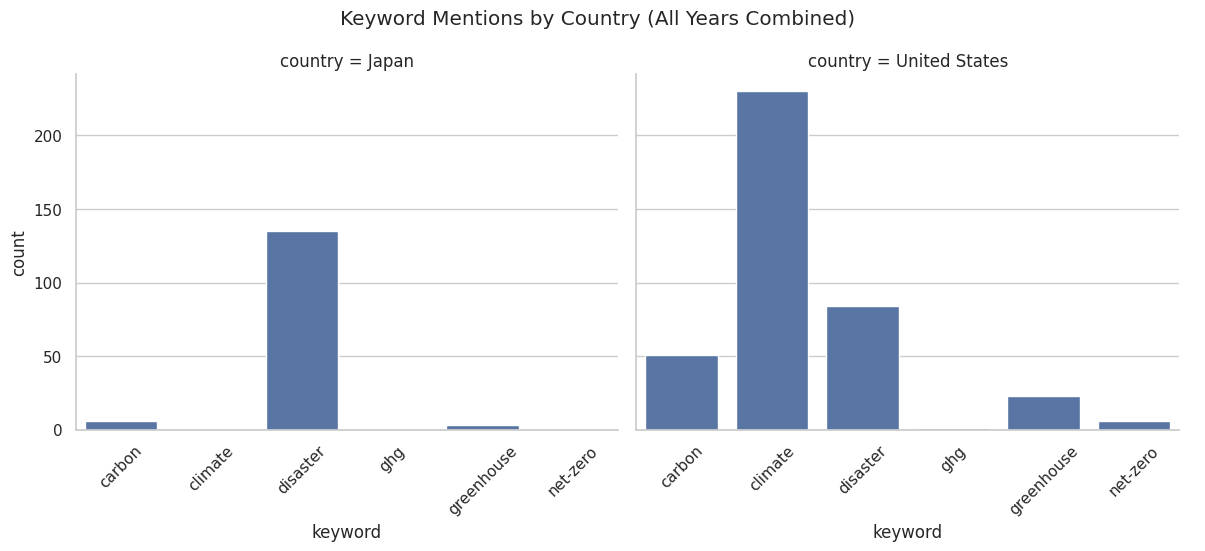

In [95]:
# Step 1: Melt the keyword columns into long format
keyword_long_df = merged_df.melt(
    id_vars=['country', 'year'],
    value_vars=['ghg', 'greenhouse', 'net-zero', 'carbon', 'climate', 'disaster'],
    var_name='keyword',
    value_name='count'
)

# Step 2: Aggregate total mentions per keyword per country
keyword_country_totals = (
    keyword_long_df.groupby(['country', 'keyword'])['count']
    .sum()
    .reset_index()
)

# Step 3: Faceted bar plot by country
g = sns.catplot(
    data=keyword_country_totals,
    x='keyword', y='count', col='country',
    kind='bar', col_wrap=2, height=5, aspect=1.2
)

# Final plot styling
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Keyword Mentions by Country (All Years Combined)")
g.set_xticklabels(rotation=45)
plt.show()


# Emission by Year

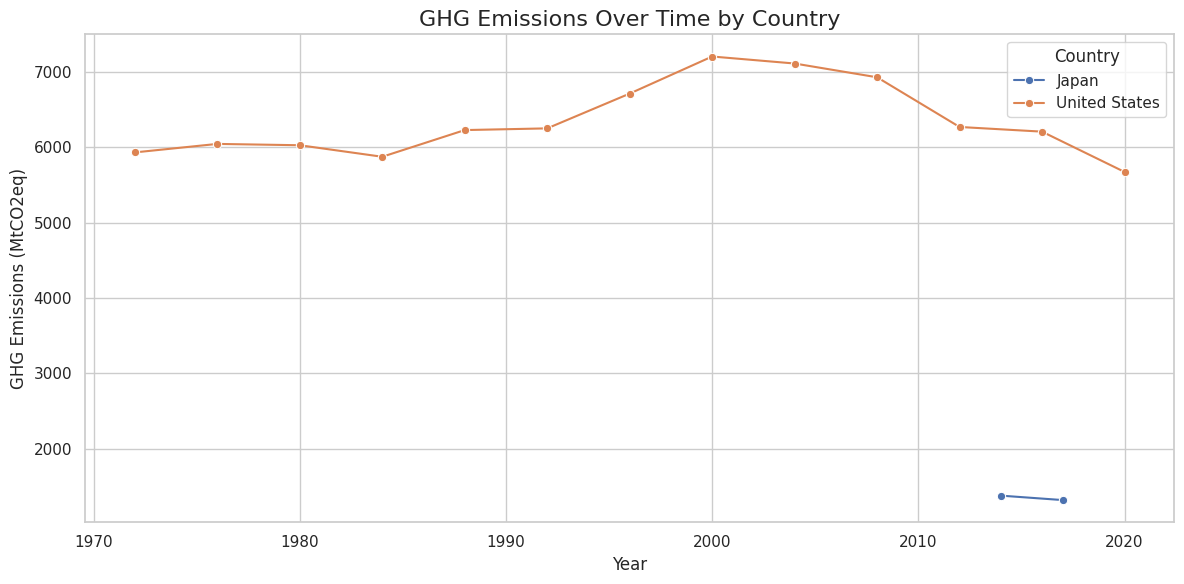

In [96]:
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x="year", y="ghg_emission", hue="country", marker='o')

# Add titles and labels
plt.title("GHG Emissions Over Time by Country", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GHG Emissions (MtCO2eq)", fontsize=12)
plt.legend(title="Country")
plt.tight_layout()

plt.show()


# Word Counts by Year

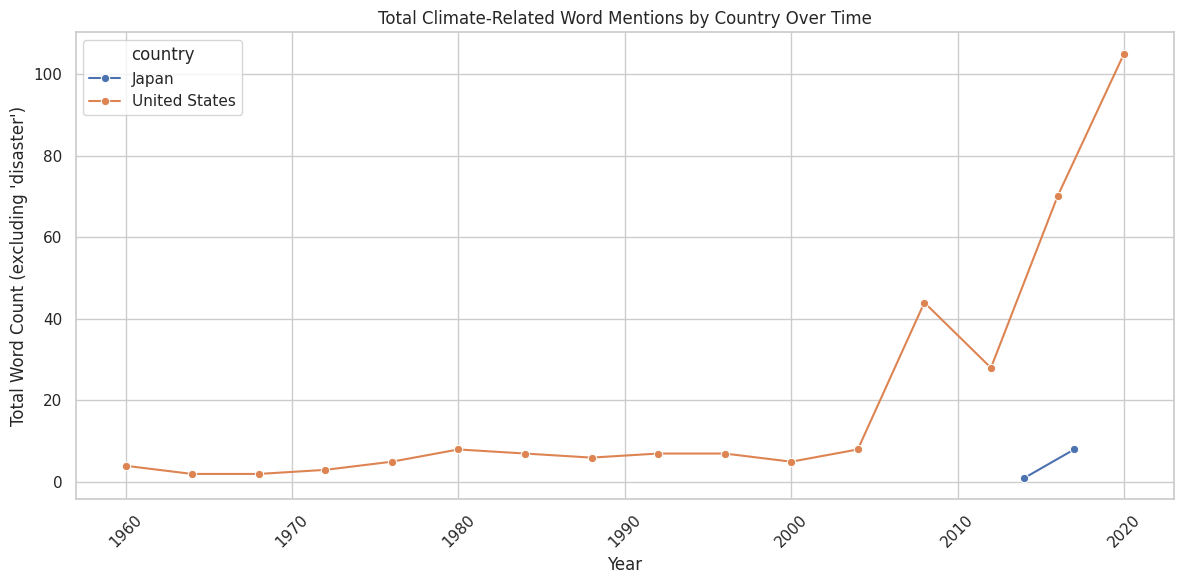

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='total_word_count', hue='country', marker='o')

# Add titles and labels
plt.title("Total Climate-Related Word Mentions by Country Over Time")
plt.xlabel("Year")
plt.ylabel("Total Word Count (excluding 'disaster')")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Emission by Word Counts

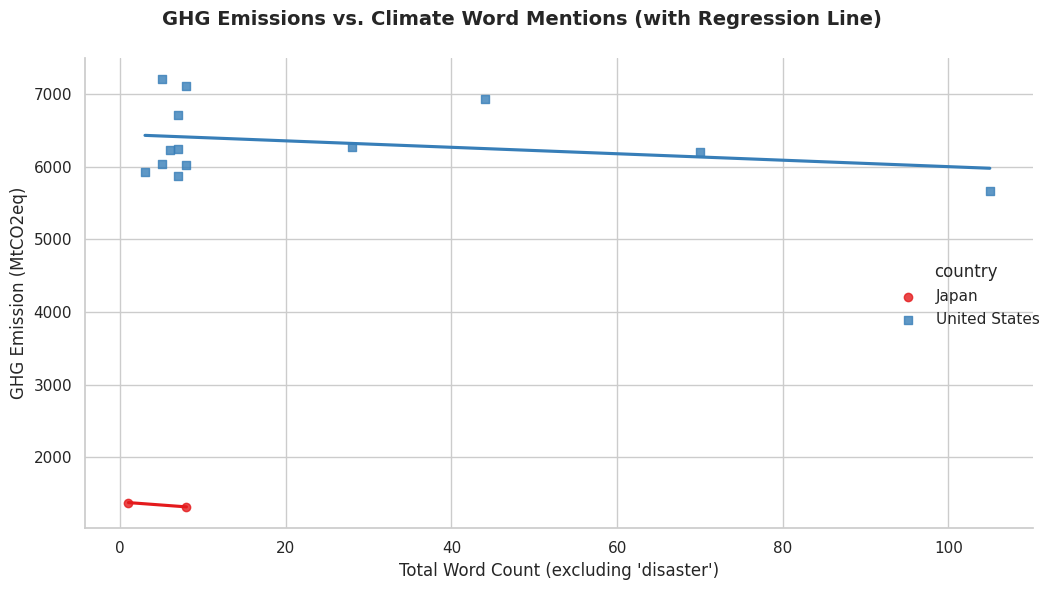

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Plot
g = sns.lmplot(
    data=merged_df,
    x="total_word_count",
    y="ghg_emission",
    hue="country",
    markers=["o", "s"],
    palette="Set1",
    ci=None,
    height=6,
    aspect=1.5
)

# Style
g.set_axis_labels("Total Word Count (excluding 'disaster')", "GHG Emission (MtCO2eq)")
g.fig.suptitle("GHG Emissions vs. Climate Word Mentions (with Regression Line)", fontsize=14, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()


# Simple Regression

In [99]:
# SIMPLE REGRESSIOn
# Drop missing values
regression_df = merged_df.dropna(subset=['ghg_emission', 'total_word_count'])

# Set up independent (X) and dependent (y) variables
X = regression_df['total_word_count']
y = regression_df['ghg_emission']

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ghg_emission   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.2743
Date:                Thu, 26 Jun 2025   Prob (F-statistic):              0.609
Time:                        05:43:55   Log-Likelihood:                -133.17
No. Observations:                  15   AIC:                             270.3
Df Residuals:                      13   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5495.0519    592.649  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Interpretation 1

*   R-squared: 0.021 - Only 2.1% of the variation in GHG emissions is explained by total word count.
*   Adjusted R-squared: -0.055 - Even lower, indicating poor model fit, especially for small sample size.
*   For every additional word related to climate (excluding "disaster"), GHG emissions increase by 8.70 MtCO₂eq, on average — but this effect is not statistically significant.(p value=0.609 > p=0.05)

The regression model suggests no significant relationship between the number of climate-related word mentions (excluding disaster) and GHG emissions.
Although the slope is positive, the high p-value and low R² indicate that word count is not a meaningful predictor of GHG emissions in this model.

# Multiple Regression

In [101]:
import statsmodels.formula.api as smf

# Fit model with total_word_count, year, and country
model = smf.ols('ghg_emission ~ total_word_count + year + C(country)', data=merged_df).fit()

# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ghg_emission   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     165.3
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.98e-09
Time:                        05:44:02   Log-Likelihood:                -104.60
No. Observations:                  15   AIC:                             217.2
Df Residuals:                      11   BIC:                             220.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [106]:
print(merged_df[['total_word_count', 'year']].corr())

                  total_word_count      year
total_word_count          1.000000  0.579743
year                      0.579743  1.000000


Correlation is below 0.8 but the model observaation is only 17 where the baseline for Japan has only 2 observations, that could be the possible problem of this model.

With other data scrapped for other countries, it could possibly improve the model quality.

# Interpretation 2

*   R-squared: 0.978- 97.8% of the variance in GHG emissions is explained by this model. Excellent fit.
*   Adj. R-squared: 0.972 - Still very strong after adjusting for number of predictors.
*   F statistics: 1.98e-09 - Super significant



1.   Intercept: -7.318e+04 - Baseline emission when word count = 0, year = 0, and country = Japan (extrapolated; not directly meaningful).
2.   C(country)[T.United States] : 6064.71	- Holding word count and year constant, the U.S. emits 6064 MtCO₂eq more than Japan. Very significant.
3.   total_word_count	:-18.45	- For each additional climate-related word (excluding "disaster"), emissions drop by 18.45 MtCO₂eq on average, controlling for year and country. Significant.
4.   year: +37.02	- Emissions increase by 37.02 MtCO₂eq per year, holding other variables constant. This could reflect structural or economic growth over time.

**Word mentions matter: Statistically significant and negatively associated with emissions. More climate communication correlates with less emissions.**

*(Country difference: U.S. emits far more than Japan, not much valid as observations for Japan is too low.)*

*Time trend: Surprisingly, emissions increase slightly with time, possibly due to data limitations.(Although time series of emission is showing decreasing trend)*




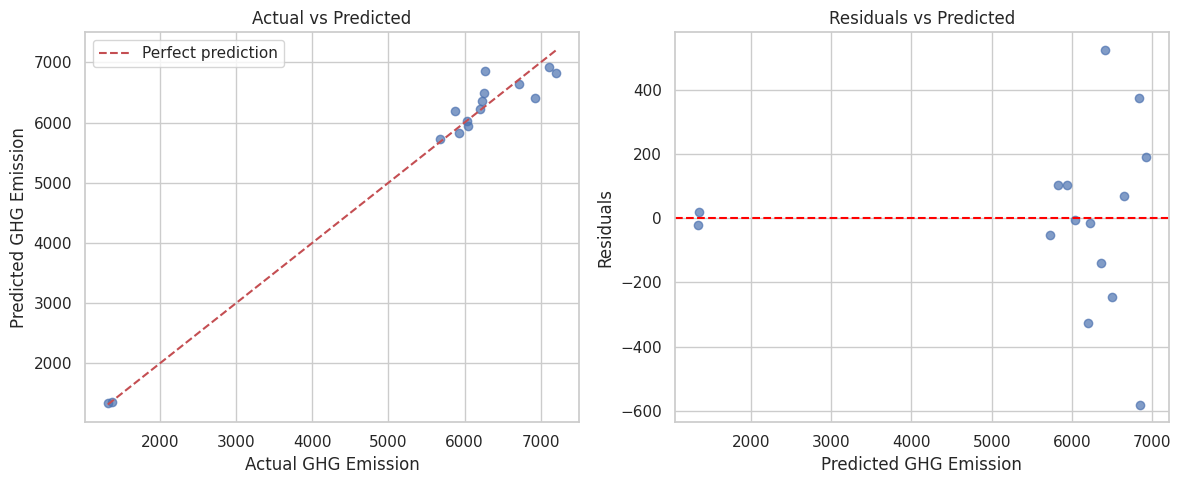

In [103]:
# Add predictions and residuals to your DataFrame
merged_df['predicted'] = model.fittedvalues
merged_df['residuals'] = model.resid

# Set up plots
plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(merged_df['ghg_emission'], merged_df['predicted'], alpha=0.7)
plt.plot([merged_df['ghg_emission'].min(), merged_df['ghg_emission'].max()],
         [merged_df['ghg_emission'].min(), merged_df['ghg_emission'].max()],
         'r--', label='Perfect prediction')
plt.xlabel('Actual GHG Emission')
plt.ylabel('Predicted GHG Emission')
plt.title('Actual vs Predicted')
plt.legend()

# Residuals vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(merged_df['predicted'], merged_df['residuals'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted GHG Emission')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()


In [104]:
# Fit model with total_word_count, year, and country
model = smf.ols('ghg_emission ~ total_word_count  + C(country)', data=merged_df).fit()

# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ghg_emission   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     98.50
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           3.58e-08
Time:                        05:46:02   Log-Likelihood:                -111.90
No. Observations:                  15   AIC:                             229.8
Df Residuals:                      12   BIC:                             231.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Interpretation

*   Based on this model, there is no statistically significant relationship between total_word_count and ghg_emission
*   There could be reduction in ghg by 4.44 Mt for one more word mentioned about ghg but it was not siginificant.



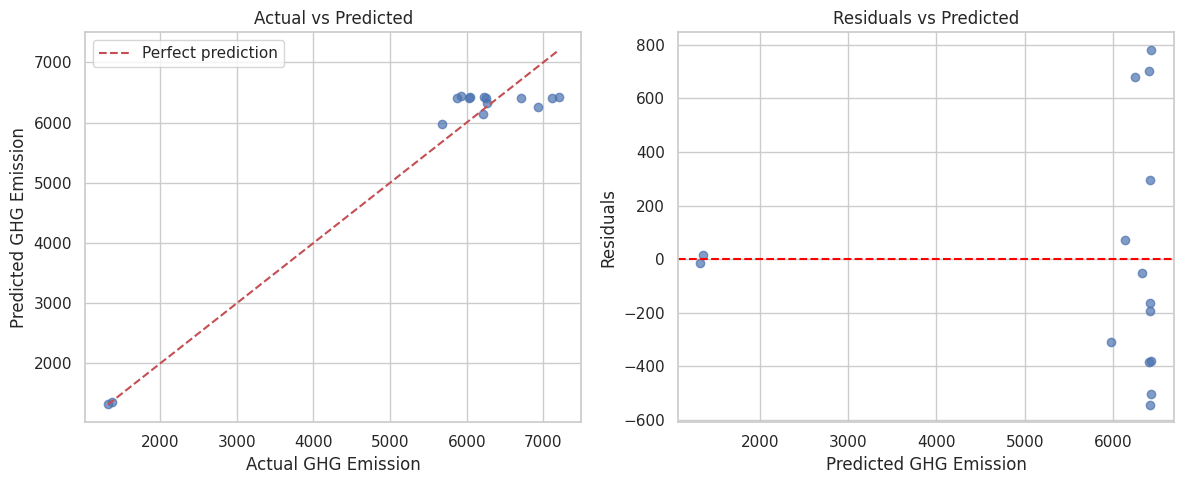

In [105]:
# Add predictions and residuals to your DataFrame
merged_df['predicted'] = model.fittedvalues
merged_df['residuals'] = model.resid

# Set up plots
plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(merged_df['ghg_emission'], merged_df['predicted'], alpha=0.7)
plt.plot([merged_df['ghg_emission'].min(), merged_df['ghg_emission'].max()],
         [merged_df['ghg_emission'].min(), merged_df['ghg_emission'].max()],
         'r--', label='Perfect prediction')
plt.xlabel('Actual GHG Emission')
plt.ylabel('Predicted GHG Emission')
plt.title('Actual vs Predicted')
plt.legend()

# Residuals vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(merged_df['predicted'], merged_df['residuals'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted GHG Emission')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()